### Data cleaning

Objectives
1. To clean and preprocess the customer churn dataset for analysis and modeling.
2. To identify and handle missing values, duplicates, and inconsistent data.
3. To encode categorical variables for machine learning algorithms.
4. To explore the distribution of key features related to customer churn.

In [78]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [79]:
df = pd.read_csv('../files/Churn.csv')
print(df.head(5))

  Customer ID  Gender  Senior Citizen Partner Dependents  tenure  \
0  7590-VHVEA  Female               0     Yes         No       1   
1  7590-VHVEG  Female               0     Yes         No       1   
2  5575-GNVDE    Male               0      No         No      34   
3  3668-QPYBK    Male               0      No         No       2   
4  7795-CFOCW    Male               0      No         No      45   

  Phone Service    Multiple Lines Internet Service Online Security  ...  \
0            No  No phone service              DSL              No  ...   
1            No  No phone service              DSL              No  ...   
2           Yes                No              DSL             Yes  ...   
3           Yes                No              DSL             Yes  ...   
4            No  No phone service              DSL             Yes  ...   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No               No   
1       

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Senior Citizen,7044.0,0.162124,0.368590,0.00,0.0,0.00,0.00,1.00
tenure,7044.0,32.366695,24.560582,0.00,9.0,29.00,55.00,72.00
Monthly Charges,7044.0,64.756736,30.090786,18.25,35.5,70.35,89.85,118.75


In [81]:
df.shape

(7044, 21)

In [82]:
# checking for null values 
print(df.isnull().sum())

# Removing null values by calculating the percentage of null values in each column
# dividing by shape means the number of rows
print("Percentage of null values in each column:")
df.isnull().mean()*100 / df.shape[0]

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64
Percentage of null values in each column:


Customer ID          0.0
Gender               0.0
Senior Citizen       0.0
Partner              0.0
Dependents           0.0
tenure               0.0
Phone Service        0.0
Multiple Lines       0.0
Internet Service     0.0
Online Security      0.0
Online Backup        0.0
Device Protection    0.0
Tech Support         0.0
Streaming TV         0.0
Streaming Movies     0.0
Contract             0.0
Paperless Billing    0.0
Payment Method       0.0
Monthly Charges      0.0
Total Charges        0.0
Churn                0.0
dtype: float64

In [83]:
# Check for duplicate rows
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 0


In [84]:
# Check for missing values
print(df.isnull().sum())


Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64


In [85]:
# List categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Check unique values in each categorical column
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

Customer ID: ['7590-VHVEA' '7590-VHVEG' '5575-GNVDE' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
Phone Service: ['No' 'Yes']
Multiple Lines: ['No phone service' 'No' 'Yes']
Internet Service: ['DSL' 'Fiber optic' 'No']
Online Security: ['No' 'Yes' 'No internet service']
Online Backup: ['Yes' 'No' 'No internet service']
Device Protection: ['No' 'Yes' 'No internet service']
Tech Support: ['No' 'Yes' 'No internet service']
Streaming TV: ['No' 'Yes' 'No internet service']
Streaming Movies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Total Charges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [86]:
# Drop CustomerID (not useful for modeling)
df = df.drop('Customer ID', axis=1)

In [87]:
# Convert Total Charges to numeric (coerce errors to NaN, then fill with 0 or median)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'] = df['Total Charges'].fillna(0)

In [88]:
# Replace 'No internet service' and 'No phone service' with 'No' in relevant columns
replace_cols = [
    'Multiple Lines', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies'
]
for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [89]:
# Encode binary categorical columns with LabelEncoder
le = LabelEncoder()
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [90]:
# One-hot encode remaining categorical columns
df = pd.get_dummies(df, drop_first=True) 

In [91]:
# Now df is ready for machine learning!
print(df.head())

   Gender  Senior Citizen  Partner  Dependents  tenure  Phone Service  \
0       0               0        1           0       1              0   
1       0               0        1           0       1              0   
2       1               0        0           0      34              1   
3       1               0        0           0       2              1   
4       1               0        0           0      45              0   

   Multiple Lines  Online Security  Online Backup  Device Protection  ...  \
0               0                0              1                  0  ...   
1               0                0              1                  0  ...   
2               0                1              0                  1  ...   
3               0                1              1                  0  ...   
4               0                1              0                  1  ...   

   Monthly Charges  Total Charges  Churn  Internet Service_Fiber optic  \
0            29.85      

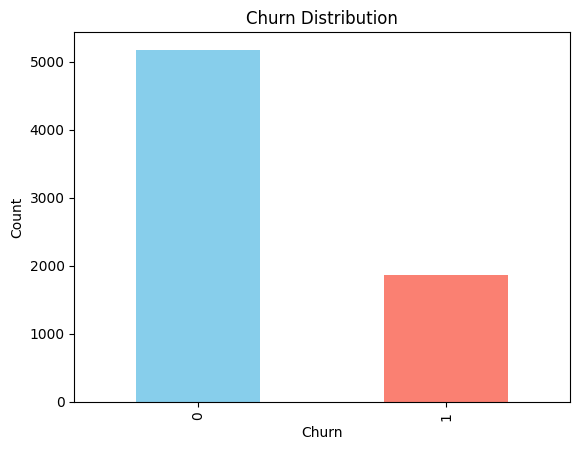

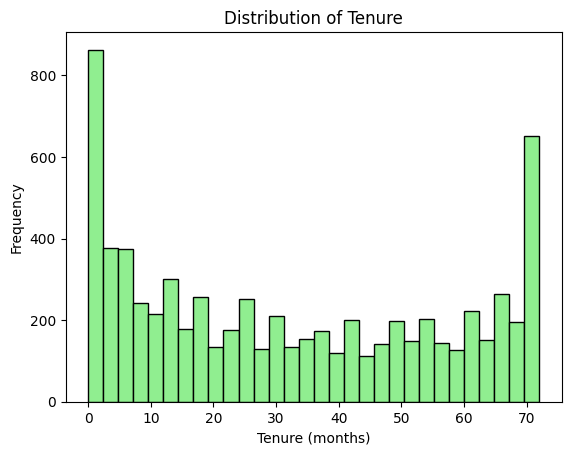

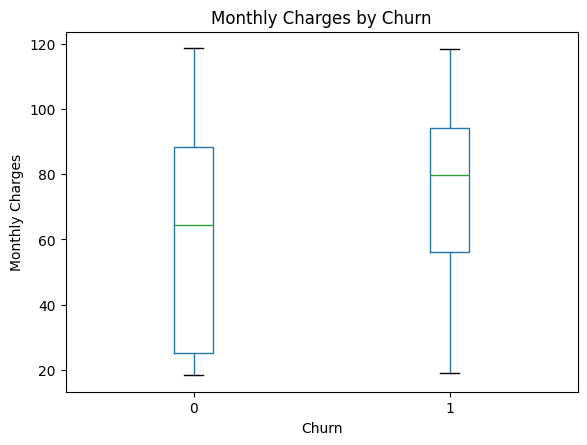

In [92]:


# Plot distribution of Churn
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Plot distribution of tenure
df['tenure'].plot(kind='hist', bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Monthly Charges by Churn
df.boxplot(column='Monthly Charges', by='Churn', grid=False)
plt.title('Monthly Charges by Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

In [93]:
# Saving the cleaned dataset to the files folder
df.to_csv('../files/Churn_cleaned.csv', index=False)
print("Cleaned dataset saved to ../files/Churn_cleaned.csv")

Cleaned dataset saved to ../files/Churn_cleaned.csv


### Key Findings
1. The dataset contained no missing values or duplicate rows.
2. Categorical variables such as 'No internet service' and 'No phone service' were standardized for consistency.
3. All categorical features were encoded using label encoding (for binary columns) and one-hot encoding (for others).
4. The Customer ID column was dropped as it is not useful for modeling.
5. The cleaned dataset is now fully numeric and ready for machine learning.
6. Exploratory plots show the distribution of churn, tenure, and monthly charges, providing insights into customer behavior.